# **Task One**

In this task, we perform an EDA (Exploratory Data Analysis) on the ***Cinnamon Quality Classification*** dataset from Kaggle.  
The dataset contains chemical composition data of Ceylon cinnamon samples classified into three quality levels: High, Medium, and Low.

Our goal is to:
- Understand the distribution of features
- Explore the relationship between features and the target variable (Quality)
- Identify patterns or correlations that may help in building a predictive model


## **Importing and Loading the Data:**

In [40]:
import pandas as pd
import os
import kagglehub

#Loading the data set
path = kagglehub.dataset_download("madaraweerasingha/cinnamon-quality-classification")
csv_path = os.path.join(path, "balanced_cinnamon_quality_dataset.csv")
cinnamon_df = pd.read_csv(csv_path)

#Info of the Data Set
print(f"{cinnamon_df.head()} \n")
print(cinnamon_df.info())

  Sample_ID  Moisture (%)  Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0      H001         10.56     5.93              1.24                    0.28   
1      H002         11.43     5.60              1.35                    0.25   
2      H003         11.10     5.70              1.21                    0.37   
3      H004         10.90     5.76              1.47                    0.27   
4      H005         10.23     5.82              1.28                    0.26   

   Chromium (mg/kg)  Coumarin (mg/kg) Quality_Label  
0            0.0019            0.0021          High  
1            0.0016            0.0039          High  
2            0.0013            0.0029          High  
3            0.0011            0.0035          High  
4            0.0013            0.0047          High   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  ---------

## **Data Exploration & Visualization**


Now that the data set loaded and ready to use, we explore the dataset by analyzing feature distributions and their relationships with the target variable.

We aim to understand how chemical attributes such as moisture, oil content, and ash levels vary across cinnamon quality levels (High, Medium, Low).

This will help us identify trends and patterns that may assist in building a predictive model.

### **Box Plots:**

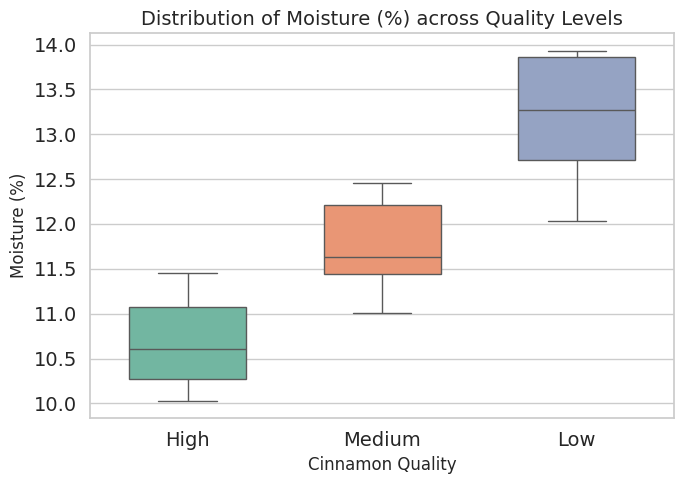

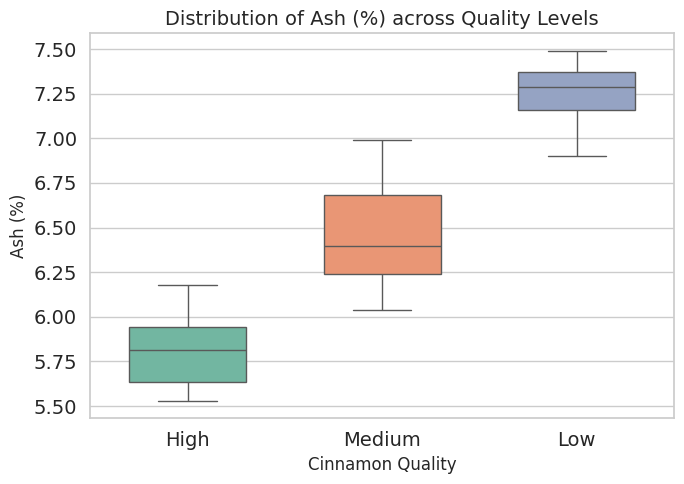

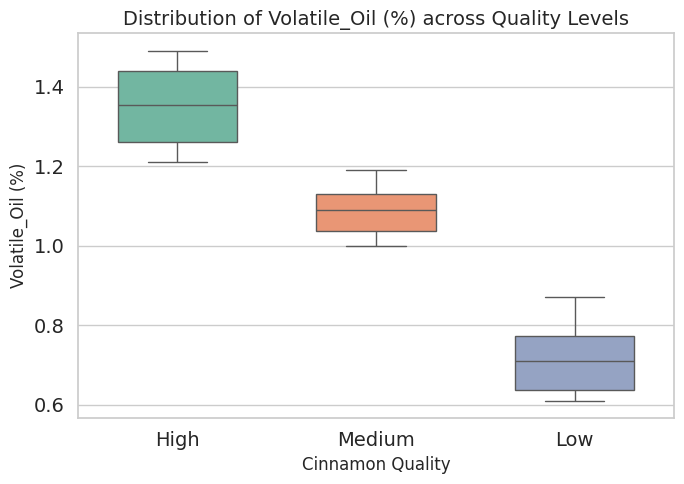

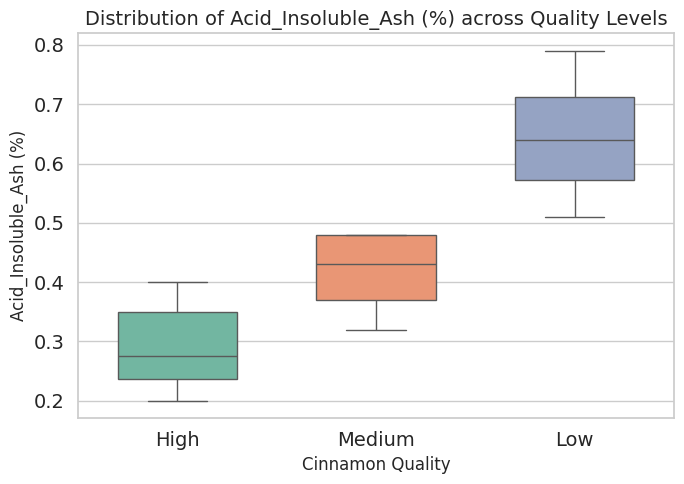

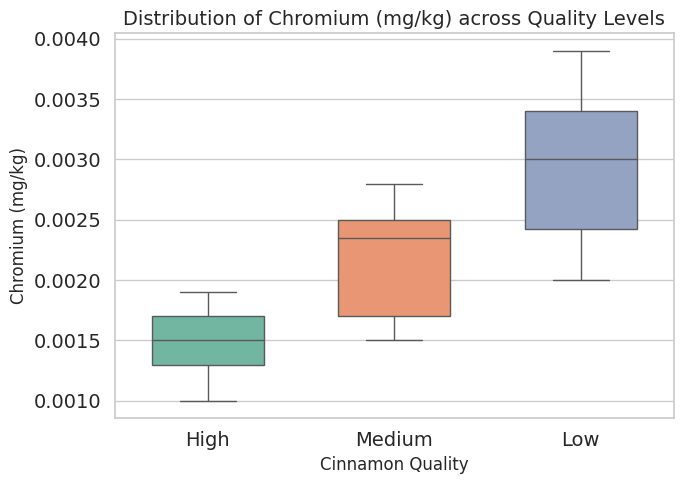

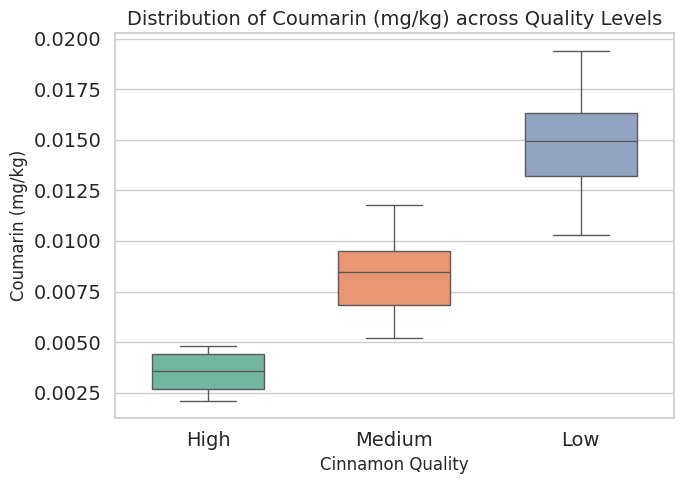

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating BoxPlots of cinnamon features
sns.set(style="whitegrid")

# here we get all the features except target column (the quality)
features = cinnamon_df.columns[:-1]
features = cinnamon_df.drop(columns=["Sample_ID", "Quality_Label"]).columns

# Creating boxplots of each feature of the cinnamons.
for feature in features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x="Quality_Label", y=feature, data=cinnamon_df, palette="Set2", width=0.6, legend = False, hue="Quality_Label")
    plt.title(f"Distribution of {feature} across Quality Levels", fontsize=14)
    plt.xlabel("Cinnamon Quality", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

    #A divider for more visually pleasing results
    print("\n" + "="*89 + "\n")


### **Correlation HeatMap:**

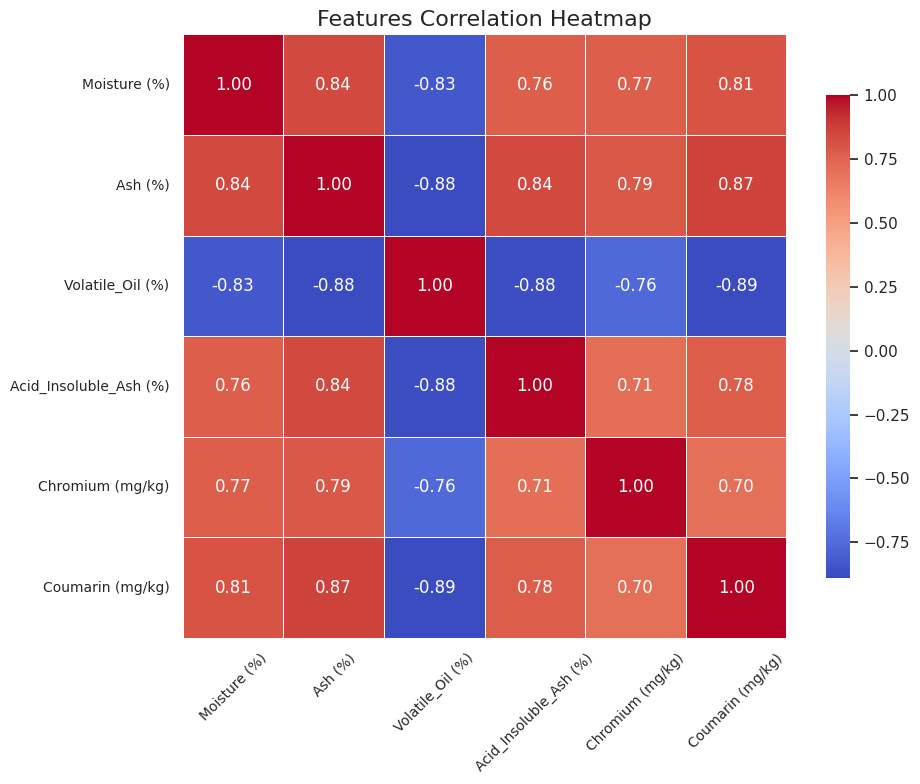

In [42]:
#Creating the Correlation heatMap of the Cinnamon's Features

plt.figure(figsize=(10, 8))
corr_matrix = cinnamon_df[features].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title("Features Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### **PairPlot for each feature:**

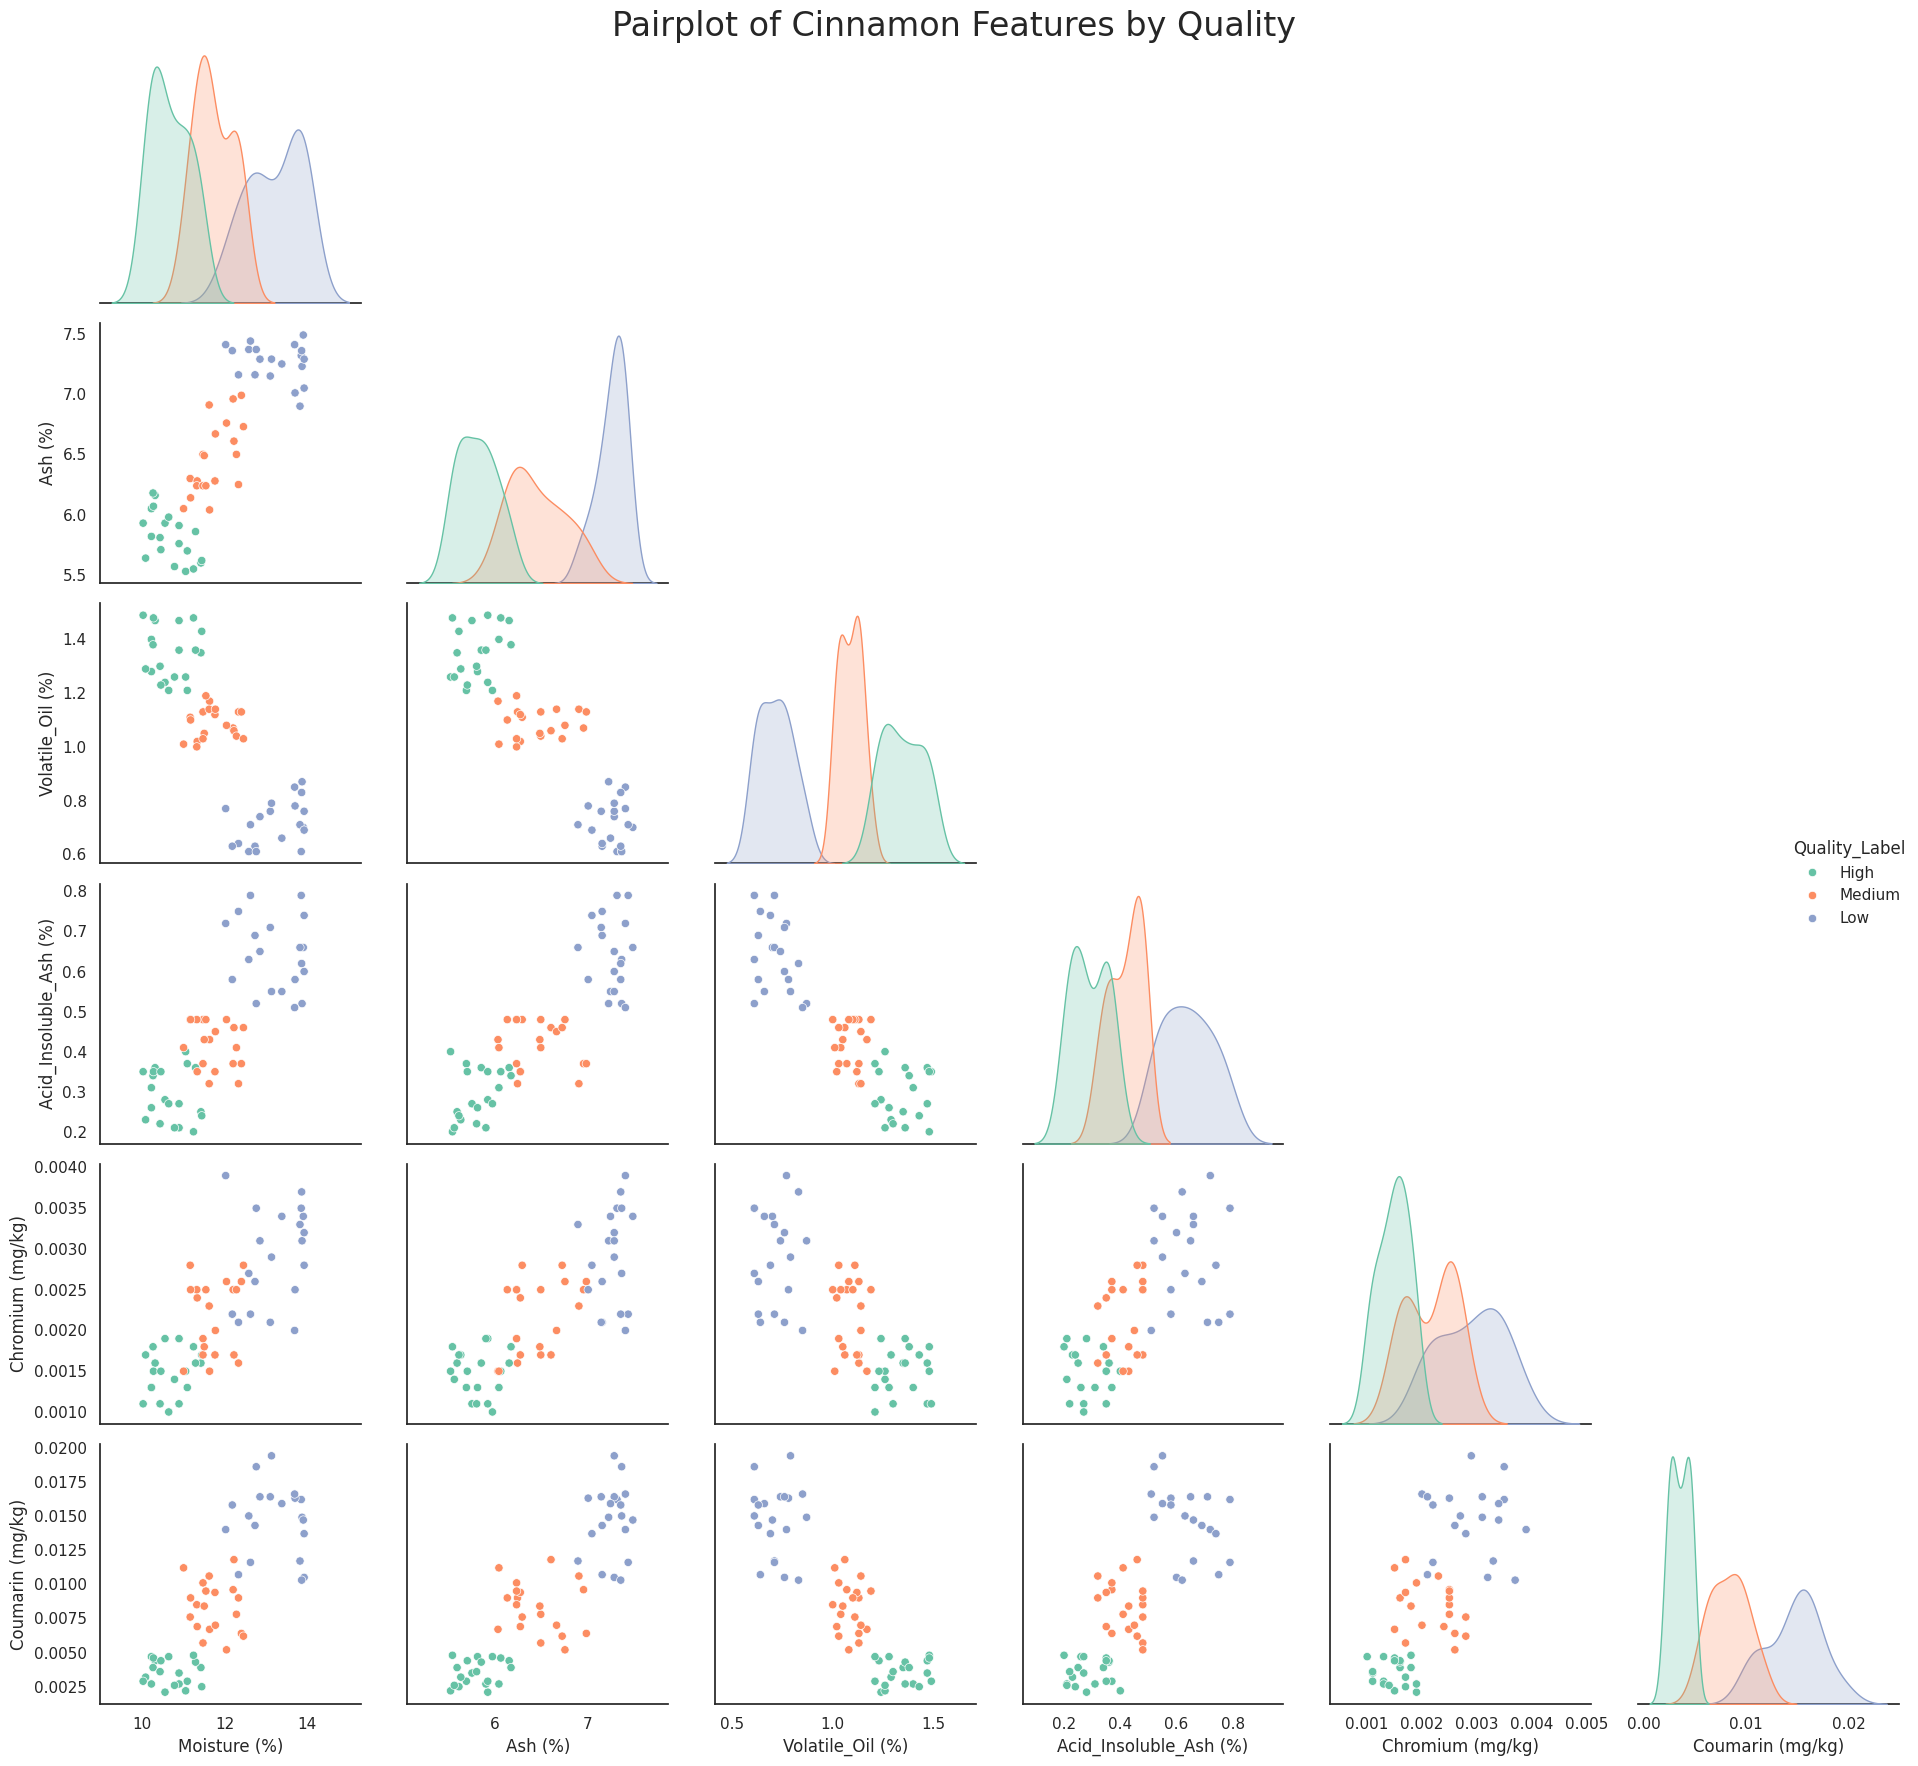

In [43]:
sns.set(style="white", palette="Set2")

pairplot = sns.pairplot(cinnamon_df, hue = "Quality_Label", height = 3, corner = True)
pairplot.fig.suptitle("Pairplot of Cinnamon Features by Quality", fontsize=24)
plt.tight_layout()
plt.show()

## **Model Training & Prediction**

After exploring the dataset and understanding the relationships between chemical attributes and cinnamon quality levels, we move forward to build a predictive model.

Our objective is to train a **Logistic Regression** model that can classify cinnamon samples into their respective quality categories (**High**, **Medium**, **Low**) based on their chemical composition.

### **1. Data Preprocessing:**
   We scale the features to ensure all attributes contribute equally to the model.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = cinnamon_df[features]
y = cinnamon_df["Quality_Label"]

print(f"x: {X.shape} \n {X.head()}")
print("\n" + "="*89 + "\n")
print(f"y: {y.shape} \n {y.head()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

x: (60, 6) 
    Moisture (%)  Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0         10.56     5.93              1.24                    0.28   
1         11.43     5.60              1.35                    0.25   
2         11.10     5.70              1.21                    0.37   
3         10.90     5.76              1.47                    0.27   
4         10.23     5.82              1.28                    0.26   

   Chromium (mg/kg)  Coumarin (mg/kg)  
0            0.0019            0.0021  
1            0.0016            0.0039  
2            0.0013            0.0029  
3            0.0011            0.0035  
4            0.0013            0.0047  


y: (60,) 
 0    High
1    High
2    High
3    High
4    High
Name: Quality_Label, dtype: object


### **2. Model Training:**
   We train a **Logistic Regression** classifier on the processed data.

In [45]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### **3. Prediction:**
   The trained model is used to make predictions on the unseen test data.

In [46]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

### **4. Evaluation:**
   The model's performance is evaluated using key classification metrics, helping us understand how well the model generalizes to new samples.

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



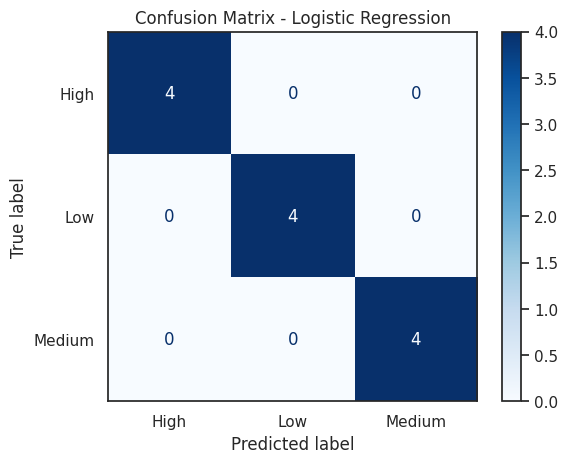

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## **Conclusion**

In this project, we successfully built a predictive model to classify the quality of cinnamon samples based on their chemical attributes. Through careful data exploration, visualization, and preprocessing, we identified key patterns that differentiate high, medium, and low-quality cinnamon.

Using a **Logistic Regression** classifier, we were able to train a model that predicts the quality label with perfect accuracy.

Overall, this project highlights how chemical composition data can be leveraged to automate and enhance quality assessment, reducing reliance on manual inspection.
